# Visualization for Kaikoura dynamic model
## created by D. Li (LMU)


In [1]:
### load module
%matplotlib notebook
#import instaseis
import numpy as np
import matplotlib.pyplot as plt
# import h5py
import pandas as pd
# import gridspec as gridspec

# import seissolxdmf 
from pythonXdmfReader.pythonXdmfReader import *
import pyproj
import scipy.io as sio
import matplotlib.tri as tri
# from mpl_toolkits.basemap import Basemap
# from scipy import spatial
from netCDF4 import Dataset

import seaborn as sns

c_blue=['#2878B5','#9AC9DB'];
c_red=['#C82423','#F8AC8C','#FF8884'];
c_gre=['#96C37D','#8ECFC9'];
c_pur=['#8B8EFE','#C497B2'];

colors2=sns.color_palette("rocket",8);
print('load modulus')

load modulus


In [63]:
modelname = 'NZ_LSW'
foldername = 'output_initial/'

energy_file =foldername +  modelname+'-energy.csv'
data1 = pd.read_csv(energy_file)

modelname = 'NZ_LSW'
foldername = 'output_03/'

energy_file =foldername +  modelname+'-energy.csv'
data2 = pd.read_csv(energy_file)


modelname = 'NZ_LSW'
foldername = 'output_027/'

energy_file =foldername +  modelname+'-energy.csv'
data3 = pd.read_csv(energy_file)

<IPython.core.display.Javascript object>


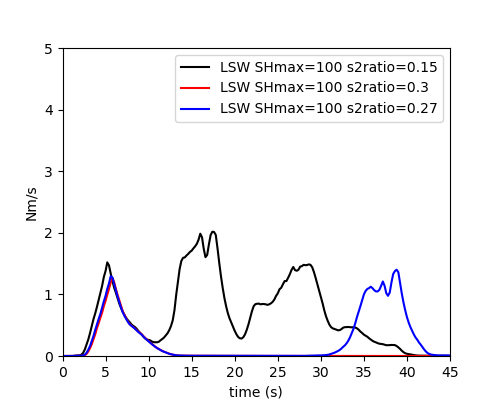

/tmp/ipykernel_27931/3655601018.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "psi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(modelname+'-mr.png',psi=200)


In [66]:

mr1 = np.diff(data1.seismic_moment)/np.diff(data1.time)
mr2 = np.diff(data2.seismic_moment)/np.diff(data2.time)
mr3 = np.diff(data3.seismic_moment)/np.diff(data3.time)


fig,ax0=plt.subplots(ncols=1,nrows=1,figsize=(5,4))
ax0.plot(data1.time[1:],mr1/1e19,'-k')
ax0.plot(data2.time[1:],mr2/1e19,'-r')
ax0.plot(data3.time[1:],mr3/1e19,'-b')

ax0.set_xlim(0,45)
ax0.set_ylim(0,5)
ax0.set_xlabel('time (s)')
ax0.set_ylabel('Nm/s')
ax0.legend(['LSW SHmax=100 s2ratio=0.15','LSW SHmax=100 s2ratio=0.3','LSW SHmax=100 s2ratio=0.27'])

plt.savefig(modelname+'-mr.png',psi=200)

In [15]:
# find stations and read records
mus=0.6
mud=0.1

modelname = 'NZ_LSW'
foldername = 'output_initial/'

foldername = 'output_initial/'

xdmfFilename = foldername + modelname+'-fault.xdmf'
# 
surfxyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

triang1 = tri.Triangulation(surfxyz[:,0]/1000,surfxyz[:,1]/1000,connect)

# asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt,oneDtMem=True,firstElement=-1)
# vr= LoadData(xdmfFilename,'Vr',connect.shape[0],idt=ndt,oneDtMem=True,firstElement=-1)

pn0 = LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
td0 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
ts0= LoadData(xdmfFilename,'Ts0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)

s_015 = (-np.sqrt(td0[0]**2+ts0[0]**2)-pn0[0]*mus)/(np.sqrt(td0[0]**2+ts0[0]**2) +mud*pn0[0])

#################

foldername = 'output_027/'

xdmfFilename = foldername + modelname+'-fault.xdmf'
# 
surfxyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

triang2 = tri.Triangulation(surfxyz[:,0]/1000,surfxyz[:,1]/1000,connect)

# asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt,oneDtMem=True,firstElement=-1)
# vr= LoadData(xdmfFilename,'Vr',connect.shape[0],idt=ndt,oneDtMem=True,firstElement=-1)

pn0 = LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
td0 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
ts0= LoadData(xdmfFilename,'Ts0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)

s_027 = (-np.sqrt(td0[0]**2+ts0[0]**2)-pn0[0]*mus)/(np.sqrt(td0[0]**2+ts0[0]**2) +mud*pn0[0])


<IPython.core.display.Javascript object>


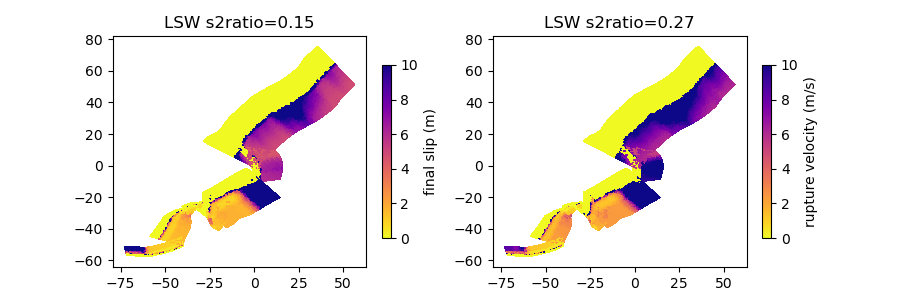

In [19]:
# plot comparison

fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(9,3))

sc = ax0.tripcolor(triang1,s_015,cmap='plasma_r',shading='flat',vmin=0.0,vmax=10.0)
cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
cl.set_label('final slip (m)')
ax0.set_title('LSW s2ratio=0.15')

sc = ax1.tripcolor(triang2,s_027,cmap='plasma_r',shading='flat',vmin=0.0,vmax=10.0)
cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
cl.set_label('rupture velocity (m/s)')
ax1.set_title('LSW s2ratio=0.27')

outname = modelname+'-sratio.png'
plt.savefig(outname,dpi=200,transparent=False)


<IPython.core.display.Javascript object>


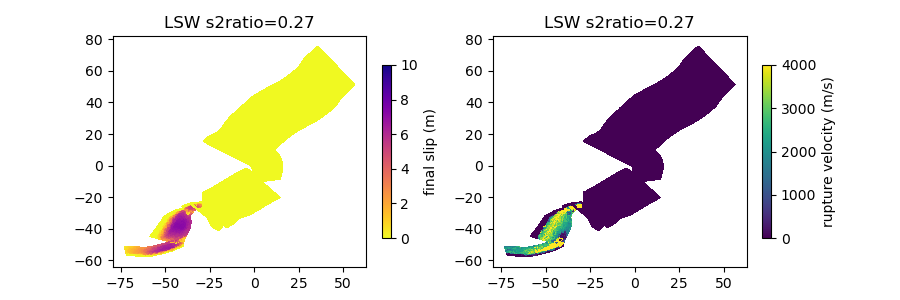

In [21]:
# plot faut slip and rupture velocity

foldername = 'output_027/'

xdmfFilename = foldername + modelname+'-fault.xdmf'
# 
surfxyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)
ndt = ReadNdt(xdmfFilename)-1

triang = tri.Triangulation(surfxyz[:,0]/1000,surfxyz[:,1]/1000,connect)

asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt,oneDtMem=True,firstElement=-1)
vr= LoadData(xdmfFilename,'Vr',connect.shape[0],idt=ndt,oneDtMem=True,firstElement=-1)

fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(9,3))

sc = ax0.tripcolor(triang,asl[0],cmap='plasma_r',shading='flat',vmin=0.0,vmax=10.0)
cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
cl.set_label('final slip (m)')
ax0.set_title('LSW s2ratio=0.27')

sc = ax1.tripcolor(triang,vr[0],cmap='viridis',shading='flat',vmin=0.0,vmax=4000.0)
cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
cl.set_label('rupture velocity (m/s)')
ax1.set_title('LSW s2ratio=0.27')

outname = modelname+'-slip-vr.png'
plt.savefig(outname,dpi=200,transparent=False)